In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

In [3]:
inv = np.linalg.inv

# Generate sample time series data

Same as Linear Least Squares example.

In [4]:
t = np.linspace(0, 3, 600)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Two sensors

In [5]:
noise_mean = 0

noise_std_1 = 20
noise_std_2 = 0.5

v = []
v_std = []
noise_i = 1
n_chunks = 0
while len(v)<len(t):
    if noise_i == 1:
        noise_i = 2
        noise_std = noise_std_2
        chunk_size = 50
    else:
        noise_i = 1
        noise_std = noise_std_1
        chunk_size = 150

    v_std = np.hstack( (v_std, [noise_std]*chunk_size) )
    v = np.hstack( (v, np.random.normal(noise_mean, noise_std, chunk_size)) )
    n_chunks += 1

v_std = v_std[0:len(t)]
v = v[0:len(t)]

v_std = np.column_stack(v_std).T
v = np.column_stack(v).T

y_tilde = y+v

In [6]:
n_chunks

6

# Plotting

<Axes: xlabel='Time', ylabel='y'>

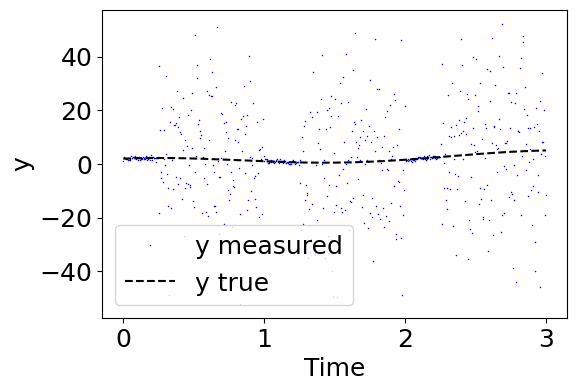

In [7]:
plot_tme(t, y, y_tilde)

# Candidate models

In [8]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Minimum Variance Estimate: Gauss-Markov Theorem

$\mathbf{\hat{x}}=(H^{\top}R^{-1}H)^{-1}H^{\top}R^{-1}\mathbf{\tilde{y}}$

In [9]:
R = np.diag( np.ravel(v_std)**2)
print(R)

[[2.5e-01 0.0e+00 0.0e+00 ... 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 2.5e-01 0.0e+00 ... 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 2.5e-01 ... 0.0e+00 0.0e+00 0.0e+00]
 ...
 [0.0e+00 0.0e+00 0.0e+00 ... 4.0e+02 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 0.0e+00 4.0e+02 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 0.0e+00 0.0e+00 4.0e+02]]


### Model 1

In [10]:
x_1_hat = inv(model_1_H.T@inv(R)@model_1_H)@model_1_H.T@inv(R)@y_tilde

<Axes: xlabel='Time', ylabel='y'>

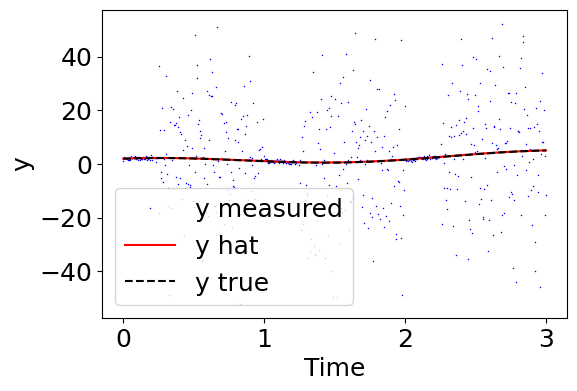

In [11]:
y_1_hat = model_1_H@x_1_hat
plot_tme(t, y, y_tilde, y_1_hat)

In [12]:
x_error = x_1_hat - x[0:3]
print(x_error)

[[ 0.0057871 ]
 [ 0.05149219]
 [-0.00517308]]


# Covariance of x error

In [13]:
P = x_error@x_error.T
print(P)

[[ 3.34905783e-05  2.97990677e-04 -2.99371582e-05]
 [ 2.97990677e-04  2.65144552e-03 -2.66373246e-04]
 [-2.99371582e-05 -2.66373246e-04  2.67607634e-05]]


# Cramer Rao Bound

The diagonal elements of P should (on average) be equal to (or bigger than) the diagonal elements of CRB (provided enough data or replicates).

In [14]:
CRB = inv(model_1_H.T@inv(R)@model_1_H)
print(CRB)

[[ 7.76558663e-03 -1.41714328e-02  4.55898544e-05]
 [-1.41714328e-02  3.03731901e-02  2.34729457e-03]
 [ 4.55898544e-05  2.34729457e-03  4.57115294e-03]]


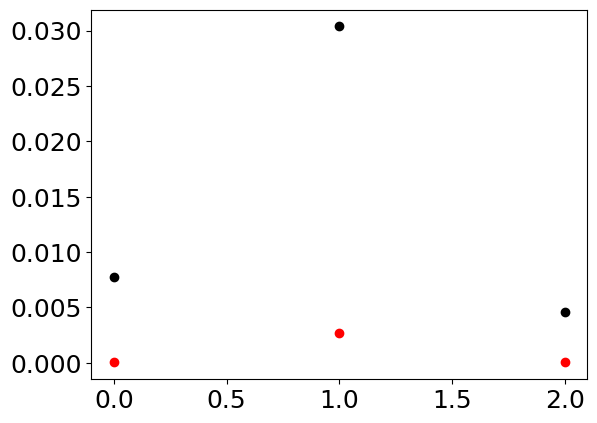

In [15]:
plt.plot(np.diag(P), 'o', color='red')
plt.plot(np.diag(CRB), 'o', color='black')

# Exercise

If you use the wrong R for your estimates (but the true R for CRB), than does your P get much worse than the CRB (worse being larger)?

In [27]:
R_rand = np.random.randint(1,10, R.shape)
#R_rand = np.random.uniform(0.00001,0.01, R.shape)

In [28]:
x_1_hat = inv(model_1_H.T@inv(R_rand)@model_1_H)@model_1_H.T@inv(R_rand)@y_tilde
y_1_hat = model_1_H@x_1_hat


In [29]:
x_error = x_1_hat - x[0:3]
print(x_error)

[[-66.55661639]
 [373.91945101]
 [ 90.50338367]]


In [30]:
P = x_error@x_error.T
print(P)

[[  4429.78318519 -24886.81346145  -6023.59898872]
 [-24886.81346145 139815.75584459  33840.97553581]
 [ -6023.59898872  33840.97553581   8190.86245536]]


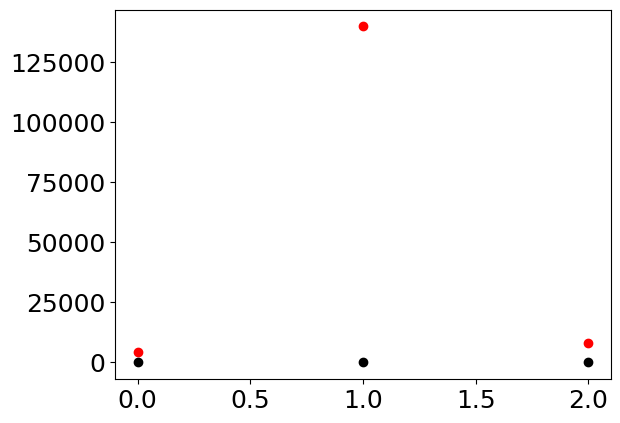

In [31]:
plt.plot(np.diag(P), 'o', color='red')
plt.plot(np.diag(CRB), 'o', color='black')

In [26]:
print(np.diag(P)-np.diag(CRB))

[2.13889010e+01 5.71485292e+04 4.16292020e+03]
